# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [72]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import citipy
import json
import pickle
import scipy.stats as st
from scipy.stats import linregress
# Import API key
from api_keys import weather_api_key

#weather_api_key = "45bf9b61841bc3f8d97f36b9c07445ef"
#api_key = weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [37]:
api_keys

'45bf9b61841bc3f8d97f36b9c07445ef'

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



['iwanai',
 'buala',
 'santa marta',
 'vostok',
 'tuyen quang',
 'qaanaaq',
 'saldanha',
 'berlevag',
 'barrow',
 'novoagansk',
 'hobart',
 'ponta pora',
 'hithadhoo',
 'vardo',
 'ilulissat',
 'tasiilaq',
 'albany',
 'punta arenas',
 'marrakesh',
 'arraial do cabo',
 'ushuaia',
 'dikson',
 'codrington',
 'taolanaro',
 'zig',
 'charters towers',
 'kavaratti',
 'santa maria',
 'porto novo',
 'kamenskoye',
 'arlit',
 'bengkulu',
 'hasaki',
 'norman wells',
 'hilo',
 'geraldton',
 'kapaa',
 'yanan',
 'hambantota',
 'okhotsk',
 'belushya guba',
 'hay river',
 'mocambique',
 'bethel',
 'egvekinot',
 'nioro',
 'port elizabeth',
 'hualmay',
 'sao filipe',
 'puerto ayora',
 'turayf',
 'port blair',
 'butaritari',
 'manta',
 'paradwip',
 'cape town',
 'wangqing',
 'rikitea',
 'tura',
 'yaring',
 'ambilobe',
 'mahebourg',
 'busselton',
 'san jose',
 'khapa',
 'kieta',
 'ranong',
 'wulanhaote',
 'senno',
 'poquoson',
 'umzimvubu',
 'teguldet',
 'shelburne',
 'havre-saint-pierre',
 'vaini',
 'qaqor

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [24]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={api_keys}&units={units}&q="
#query_url 
city_data=[]
#print(f'processing Record of set {city_number} for {city_name}')
for i,city in enumerate(cities,1):
    print(i)
    try:
        response = requests.get(query_url + city).json()
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lon"]
        city_max_temp = response["main"]["temp_max"]
        city_humidity = response["main"]["humidity"]
        city_clouds = response["clouds"]["all"]
        city_wind = response["wind"]["speed"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        city_data.append({"City": city,
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except KeyError:
           print("City not found")
           pass

         


    #city_data.append(response['name'])
    #city_name.append(response['name'])   
    #print(f'{city_name}')
    #print(f'processing Record of set {city_number} for {city_name}')
#print(json.dumps(response, indent=4, sort_keys=True))

1
2
3
4
City not found
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
City not found
24
25
26
27
28
29
30
31
32
33
34
35
36
City not found
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
City not found
63
64
65
66
67
City not found
68
69
70
71
72
73
City not found
74
75
76
77
78
79
City not found
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
City not found
103
104
105
106
107
108
109
110
111
City not found
112
113
114
115
116
117
118
119
City not found
120
121
122
123
124
125
126
127
128
129
130
131
132
City not found
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
City not found
152
City not found
153
154
155
156
157
158
159
160
161
162
163
164
City not found
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
City not found
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
City not found
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217


In [26]:
print(f'{city_data}')

[{'City': 'coihaique', 'Lat': -45.58, 'Lng': -72.07, 'Max Temp': 13, 'Humidity': 62, 'Cloudiness': 75, 'Wind Speed': 2.6, 'Country': 'CL', 'Date': 1586729388}, {'City': 'rikitea', 'Lat': -23.12, 'Lng': -134.97, 'Max Temp': 25.63, 'Humidity': 84, 'Cloudiness': 67, 'Wind Speed': 6.91, 'Country': 'PF', 'Date': 1586729324}, {'City': 'kahului', 'Lat': 20.89, 'Lng': -156.47, 'Max Temp': 26, 'Humidity': 69, 'Cloudiness': 75, 'Wind Speed': 5.1, 'Country': 'US', 'Date': 1586729106}, {'City': 'santa maria', 'Lat': -29.68, 'Lng': -53.81, 'Max Temp': 20.77, 'Humidity': 57, 'Cloudiness': 9, 'Wind Speed': 1.98, 'Country': 'BR', 'Date': 1586729537}, {'City': 'manzanillo', 'Lat': 20.34, 'Lng': -77.12, 'Max Temp': 33.14, 'Humidity': 38, 'Cloudiness': 0, 'Wind Speed': 1.86, 'Country': 'CU', 'Date': 1586729784}, {'City': 'severo-kurilsk', 'Lat': 50.68, 'Lng': 156.12, 'Max Temp': -0.91, 'Humidity': 94, 'Cloudiness': 88, 'Wind Speed': 3.81, 'Country': 'RU', 'Date': 1586729785}, {'City': 'springbok', 'Lat':

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
import csv
import os
csv_columns =['City','Lat','Lng','Max_Temp','Humidity','Cloudiness','Wind Speed','Country','Date']
output_data_file = os.path.join("..", "output_data", "cities.csv")
#output_data_file = "output_data/cities.csv"
with open(output_data_file,'w') as csvfile:
    csv_columns =['City','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed','Country','Date']
    csvwriter = csv.DictWriter(csvfile,fieldnames=csv_columns)
    csvwriter.writeheader()
    for line in city_data:
         csvwriter.writerow(line)
        
   



In [47]:
file = '../output_data/cities.csv'
cities_df = pd.read_csv(file)
cities_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,coihaique,-45.58,-72.07,13.00,62,75,2.60,CL,1586729388
1,rikitea,-23.12,-134.97,25.63,84,67,6.91,PF,1586729324
2,kahului,20.89,-156.47,26.00,69,75,5.10,US,1586729106
3,santa maria,-29.68,-53.81,20.77,57,9,1.98,BR,1586729537
4,manzanillo,20.34,-77.12,33.14,38,0,1.86,CU,1586729784
...,...,...,...,...,...,...,...,...,...
596,farah,32.50,62.50,18.76,44,100,1.74,AF,1586730468
597,campbell river,50.02,-125.24,15.00,13,5,3.10,CA,1586730469
598,zyryanka,65.75,150.85,-3.97,97,99,2.95,RU,1586730470
599,westport,41.14,-73.36,17.00,58,1,4.10,US,1586730429


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

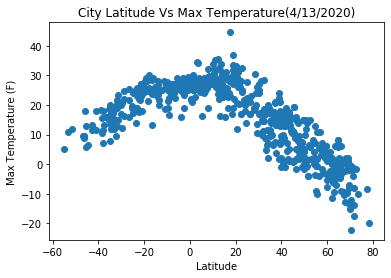

In [50]:
plt.scatter('Lat','Max Temp',data =cities_df)
plt.title('City Latitude Vs Max Temperature(4/13/2020)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

#### Latitude vs. Humidity Plot

(0, 150)

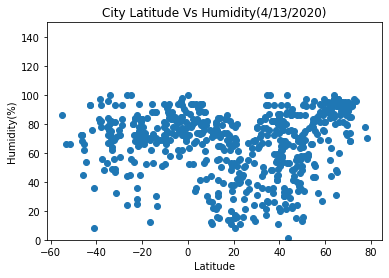

In [53]:
plt.scatter('Lat','Humidity',data =cities_df)
plt.title('City Latitude Vs Humidity(4/13/2020)')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.ylim(0,150)

#### Latitude vs. Cloudiness Plot

(0, 150)

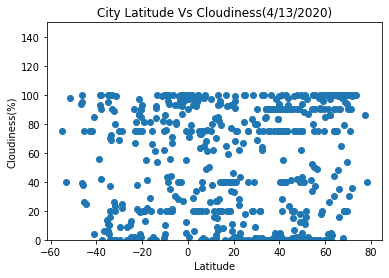

In [54]:
plt.scatter('Lat','Cloudiness',data =cities_df)
plt.title('City Latitude Vs Cloudiness(4/13/2020)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.ylim(0,150)

#### Latitude vs. Wind Speed Plot

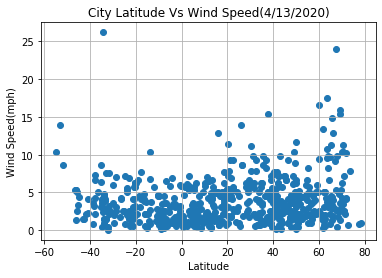

In [55]:
plt.scatter('Lat','Wind Speed',data =cities_df)
plt.title('City Latitude Vs Wind Speed(4/13/2020)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid()

## Linear Regression

In [108]:
# OPTIONAL: Create a function to create Linear Regression plots


In [59]:
# Create Northern and Southern Hemisphere DataFrames
North_Hem_df = cities_df.loc[cities_df["Lat"] > 0, [
    "City", "Lat", "Max Temp","Humidity","Cloudiness","Wind Speed"]]

North_Hem_df.head()


,City,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
2,kahului,20.89,26.00,69,75,5.10
4,manzanillo,20.34,33.14,38,0,1.86
5,severo-kurilsk,50.68,-0.91,94,88,3.81
7,tevriz,57.51,3.12,86,98,3.77
8,ayotzintepec,17.67,44.56,14,59,1.28


In [60]:
South_Hem_df = cities_df.loc[cities_df["Lat"] <= 0, [
    "City", "Lat", "Max Temp","Humidity","Cloudiness","Wind Speed"]]

South_Hem_df.head()

,City,Lat,Max Temp,Humidity,Cloudiness,Wind Speed
0,coihaique,-45.58,13.00,62,75,2.60
1,rikitea,-23.12,25.63,84,67,6.91
3,santa maria,-29.68,20.77,57,9,1.98
6,springbok,-29.66,12.12,72,0,0.95
9,vaini,-21.20,27.00,69,20,4.10


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7892685838185708


Text(0, 0.5, 'Max Temp')

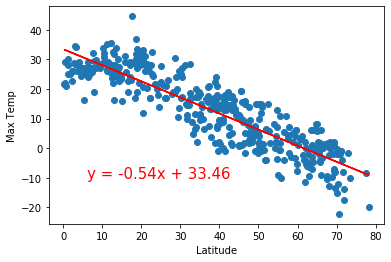

In [85]:
x_values = North_Hem_df['Lat']
y_values = North_Hem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
print(f"The r-squared is: {rvalue**2}")
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6395173364001135


Text(0, 0.5, 'Max Temp')

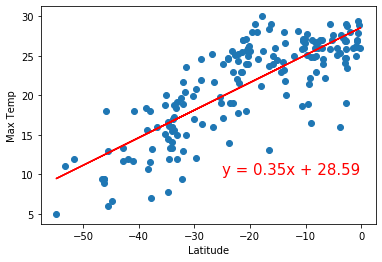

In [86]:
x1_values = South_Hem_df['Lat']
y1_values = South_Hem_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x1_values, y1_values)
print(f"The r-squared is: {rvalue**2}")
regress_values = x1_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x1_values,y1_values)
plt.plot(x1_values,regress_values,"r-")
plt.annotate(line_eq,(-25,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08205729090910642


Text(0, 0.5, 'Humidty')

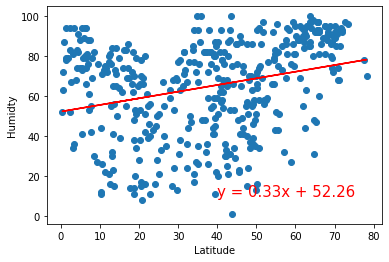

In [89]:
x2_values = North_Hem_df['Lat']
y2_values = North_Hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x2_values, y2_values)
print(f"The r-squared is: {rvalue**2}")
regress_values = x2_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x2_values,y2_values)
plt.plot(x2_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidty')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.03870435093318155


Text(0, 0.5, 'Humidty')

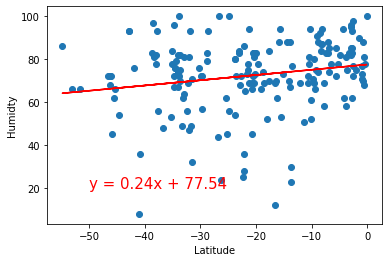

In [91]:
x3_values = South_Hem_df['Lat']
y3_values = South_Hem_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x3_values, y3_values)
print(f"The r-squared is: {rvalue**2}")
regress_values = x3_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x3_values,y3_values)
plt.plot(x3_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidty')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.033726393941543906


Text(0, 0.5, 'Cloudiness')

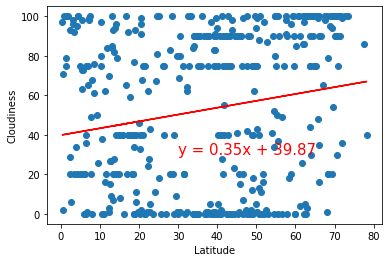

In [96]:
x4_values = North_Hem_df['Lat']
y4_values = North_Hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x4_values, y4_values)
print(f"The r-squared is: {rvalue**2}")
regress_values = x4_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x4_values,y4_values)
plt.plot(x4_values,regress_values,"r-")
plt.annotate(line_eq,(30,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.5961977584582517
The r-squared is: 0.04646236919987758


Text(0, 0.5, 'Cloudiness')

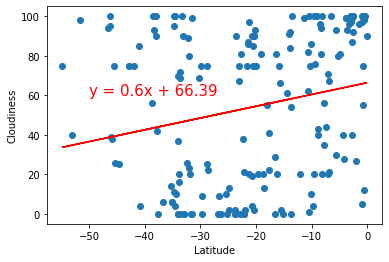

In [100]:
x5_values = South_Hem_df['Lat']
y5_values = South_Hem_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x5_values, y5_values)
print(f'{slope}')
print(f"The r-squared is: {rvalue**2}")
regress_values = x5_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x5_values,y5_values)
plt.plot(x5_values,regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

0.02991694118804439
The r-squared is: 0.037161241717169884


Text(0, 0.5, 'Wind Speed')

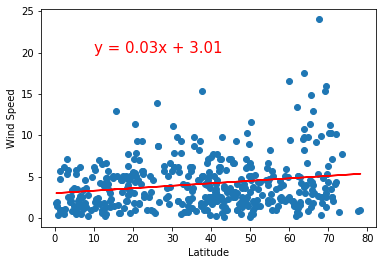

In [104]:
x6_values = North_Hem_df['Lat']
y6_values = North_Hem_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x6_values, y6_values)
print(f'{slope}')
print(f"The r-squared is: {rvalue**2}")
regress_values = x6_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x6_values,y6_values)
plt.plot(x6_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.07954510076605131


Text(0, 0.5, 'Wind Speed')

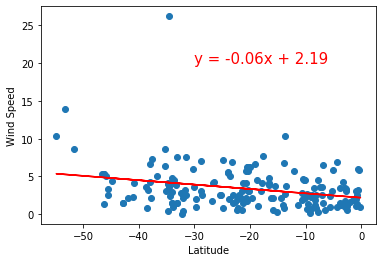

In [107]:
x7_values = South_Hem_df['Lat']
y7_values = South_Hem_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x7_values, y7_values)
print(f"The r-squared is: {rvalue**2}")
regress_values = x7_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x7_values,y7_values)
plt.plot(x7_values,regress_values,"r-")
plt.annotate(line_eq,(-30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')